In [ ]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Bike Sharing Assignment

### Problem Statement:
A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state.

Essentially the company wants :
- To understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19, by creating a linear model.
- To identify the variables affecting their revenues i.e. Which variables are significant in predicting the demand for shared bikes.
- To know the accuracy of the model, i.e. How well those variables describe the bike demands

They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.

## Step 1: Reading and Understanding the Data


#### Task 1: Reading the Bike sharing dataset

In [ ]:
# Import the dataset to Google drive via mount options

ebike_df=pd.read_csv("ebikes_assignment.csv")

In [ ]:
# Check the head of the dataset
print(ebike_df.head())
print(ebike_df.tail())

   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600  
     instant      dteday  

#### Task 2: Inspecting the Dataset

In [ ]:
ebike_df.shape

(730, 16)

In [ ]:
ebike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
#summary of all the numeric columns in the dataset
ebike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Data Quality Check

#### Task 3: Check for NULL/MISSING values

In [ ]:
#Determing the number of rows and columns
ebike_df.shape

In [ ]:
# percentage of missing values in each column
ebike_df.isnull().sum()


,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
ebike_df.notnull().sum()


,0
instant,730
dteday,730
season,730
yr,730
mnth,730
holiday,730
weekday,730
workingday,730
weathersit,730
temp,730


#### Inferences :

There should be no missing values in the dataset

#### Task 4: Check for duplicate values

In [ ]:
# Check for duplicates and dropping the entire duplicate row if any
#Creating date_col variable to convet 'dteday' because to convert datetime data type
date_col=pd.to_datetime(ebike_df['dteday'],format='%d-%m-%Y')
print(date_col)
ebike_df['date_col']=date_col

0     2018-01-01
1     2018-01-02
2     2018-01-03
3     2018-01-04
4     2018-01-05
         ...    
725   2019-12-27
726   2019-12-28
727   2019-12-29
728   2019-12-30
729   2019-12-31
Name: dteday, Length: 730, dtype: datetime64[ns]


In [ ]:
duplicate=ebike_df.duplicated(subset='date_col',keep='first')
print(duplicate)
print(f"Duplicate Values--{duplicate.value_counts()}")
ebike_df['date_col'].dtypes

0      False
1      False
2      False
3      False
4      False
       ...  
725    False
726    False
727    False
728    False
729    False
Length: 730, dtype: bool
Duplicate Values--False    730
Name: count, dtype: int64


dtype('<M8[ns]')

In this case all the values are **False**. This means there is **NO DUPLICATE ROWS WERE FOUND** on the date_col feature.

#### Inferences:

There should be no duplicate values in the dataset

## Data Cleaning

#### Task 5:
1. Check value_counts() for entire dataframe. Create  function or run a loop for it
    This will help to identify any Unknown/Junk values present in the dataset.

2. Create a copy of the dataframe, without the 'instant' column,as this will have unique values, and donot make sense to do a value count on it.

In [ ]:
def value_counts_columns(df):

  for column_check in df.columns:
    print(f"Value count for column {column_check}")
    print(df[column_check].value_counts(dropna=False))
    print("*"*50)

value_counts_columns(ebike_df)


Value count for column instant
instant
730    1
1      1
2      1
3      1
4      1
      ..
15     1
14     1
13     1
12     1
11     1
Name: count, Length: 730, dtype: int64
**************************************************
Value count for column dteday
dteday
31-12-2019    1
01-01-2018    1
02-01-2018    1
03-01-2018    1
04-01-2018    1
             ..
15-01-2018    1
14-01-2018    1
13-01-2018    1
12-01-2018    1
11-01-2018    1
Name: count, Length: 730, dtype: int64
**************************************************
Value count for column season
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
**************************************************
Value count for column yr
yr
0    365
1    365
Name: count, dtype: int64
**************************************************
Value count for column mnth
mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64
****************************

In [ ]:
ebike_df2=ebike_df.copy()
ebike_df2=ebike_df2.drop("instant",axis=1)

In [ ]:
ebike_df2.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,date_col
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018-01-01
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018-01-02
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018-01-03
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018-01-04
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018-01-05


#### **Inferences**:

There seems to be no Junk/Unknown values in the entire dataset.

### Removing redundant & unwanted columns

Based on the high level look at the data and the data dictionary, the following variables can be removed from further analysis:

1. instant : Its only an index value , we have a default index for the same     purpose

2. dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we can carry out our analysis without this column .

3. casual & registered : Both these columns contains the count of bike booked by different categories of customers. Since our objective is to find the total count of bikes and not by specific category, we will ignore these two columns.

**TASK 6: Remove the above columns and save the new dataframe as bike_new, so that the original dataset is preserved for any future analysis/validation**

In [ ]:
keep_column=[]

for col in ebike_df2.columns:
  if col not in ('dteday','casual','registered','date_col'):
    keep_column.append(col)
bike_new=ebike_df2[keep_column]

In [ ]:
bike_new.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [ ]:
print(type(bike_new))
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [ ]:
#Summarizing numerical values in new Data Frame
bike_new.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Step 2: Visualising the Data

#### Task 7: Here we'll do the following tasks:
- We would be able to check if all the variables are linearly related or not (important if we want to proceed with a linear model)
- Checking if there are any multicollinearity that exist
- Here's where we can also identify if some predictors directly have a strong association(correlation) with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

#### Visualising Numeric Variables : Using a pairplot

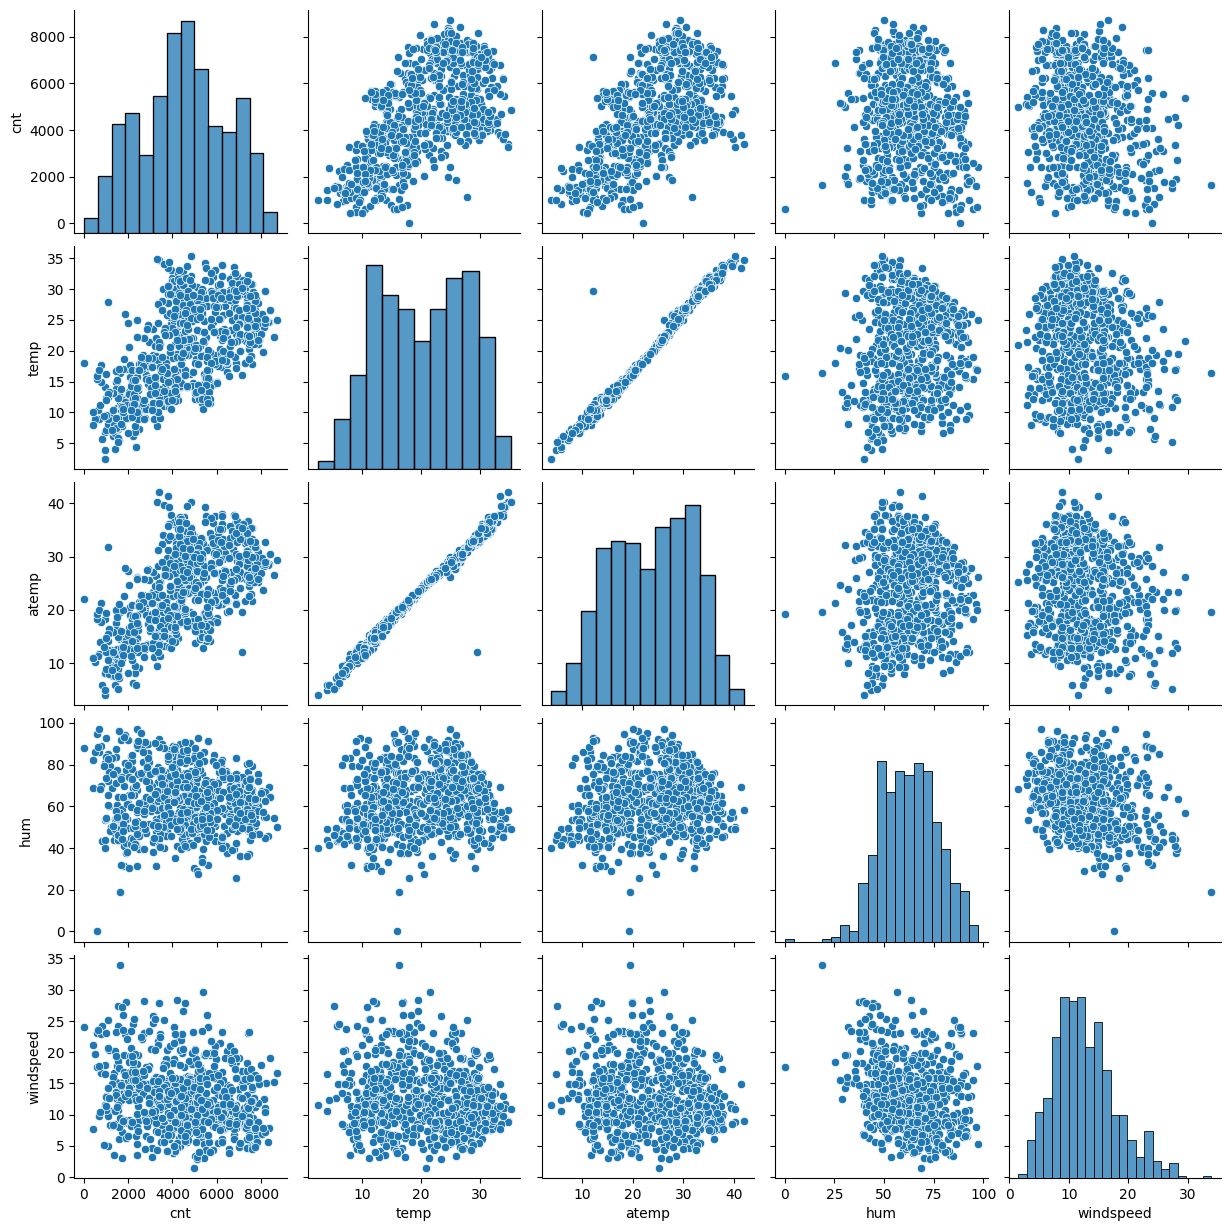

<Axes: >

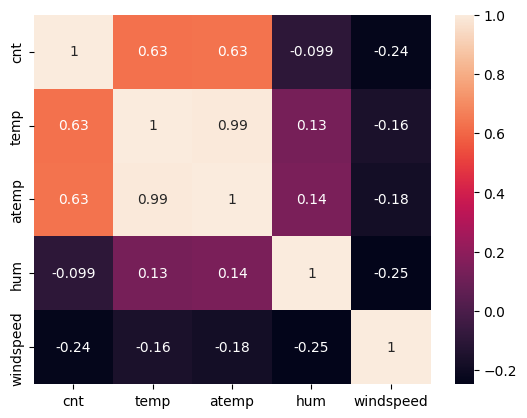

In [ ]:
#Visualizing Numerical Values alone in PAIRPLOT
numeric_features=bike_new[['cnt','temp','atemp','hum','windspeed']].copy()
sns.pairplot(data=numeric_features)
plt.show()
#Visualizing those numerical features correlation in HEAT MAP
corre_m=numeric_features.corr()
sns.heatmap(data=corre_m,annot=True)

#### Visualising Categorical Variables : Using a Boxplot

In [ ]:
bike_new.shape

(730, 12)

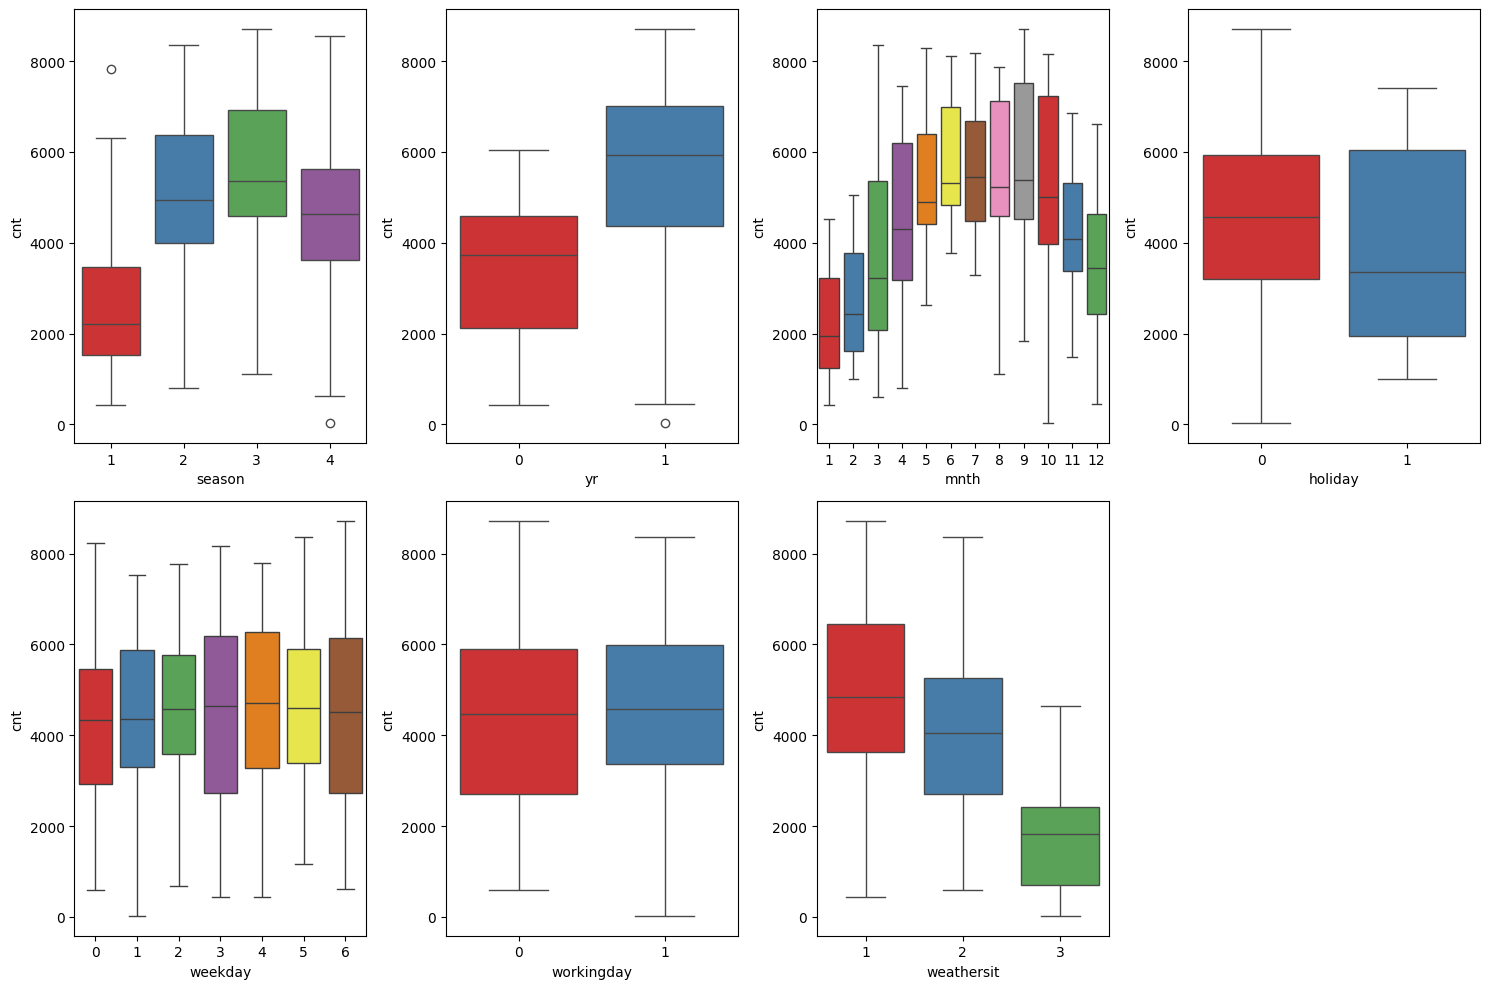

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

from os import remove
other_features = bike_new.select_dtypes(include=['int64']).copy()

if 'cnt' in other_features:
    other_features = other_features.drop(columns=['cnt'])

num_cols = 4
num_rows = (len(other_features.columns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

axes = axes.flatten()
for i, feature in enumerate(other_features.columns):
    sns.boxplot(ax=axes[i], data=bike_new, x=feature, y='cnt', palette='Set1')
# Removing extra axes only if they were created in the first place
num_axes_to_remove = num_rows * num_cols - len(other_features.columns)
if num_axes_to_remove > 0:
    for i in range(len(other_features.columns), num_rows * num_cols):
        fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

In [ ]:
def val(df):
  for col in df:
    print(f"Value of column {col}")
    print(bike_new[col].value_counts())
    print('*'*50)

val(other_features)
print(bike_new['weekday'].value_counts())

Value of column season
season
3    188
2    184
1    180
4    178
Name: count, dtype: int64
**************************************************
Value of column yr
yr
0    365
1    365
Name: count, dtype: int64
**************************************************
Value of column mnth
mnth
1     62
3     62
7     62
5     62
12    62
10    62
8     62
4     60
9     60
6     60
11    60
2     56
Name: count, dtype: int64
**************************************************
Value of column holiday
holiday
0    709
1     21
Name: count, dtype: int64
**************************************************
Value of column weekday
weekday
6    105
0    105
1    105
2    104
4    104
5    104
3    103
Name: count, dtype: int64
**************************************************
Value of column workingday
workingday
1    499
0    231
Name: count, dtype: int64
**************************************************
Value of column weathersit
weathersit
1    463
2    246
3     21
Name: count, dtype: int64
******

### <font color = 'red'> Conslusions: </font>

Provide Conclusions

<font color='orange'>      
In the Pairplot chart indicates that both temp,atemp has positive relationship with cnt and there also a slight correlations between atemp and humidity.
In the Boxplot its clearly indicate that on Holidays and Wednesday to Saturday the count is higher. On month wise March-October and Spring to Autumn Higher Count.

</font>

## Step 3: Data Preparation

Task 8: Mapping the categorical values to their respective categorical string values (reference data dictionary)

In [ ]:
import calendar

bike_new['mnth'] = bike_new['mnth'].apply(lambda x: calendar.month_abbr[x])

In [ ]:
# Mapping seasons

bike_new.season = bike_new.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

In [ ]:
# Mapping weathersit
bike_new.weathersit = bike_new.weathersit.map({1:'Clear',2:'Mist & Cloudy',3:'Light Snow & Rain',4:'Heavy Snow & Rain'})

In [ ]:
# Mapping Weekday

bike_new.weekday = bike_new.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"})

In [ ]:
# Check the dataframe now

bike_new.head()


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,Jan,0,Saturday,0,NaN,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,0,Sunday,0,NaN,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,0,Monday,1,NaN,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tuesday,1,NaN,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wednesday,1,NaN,9.305237,11.46350,43.6957,12.522300,1600


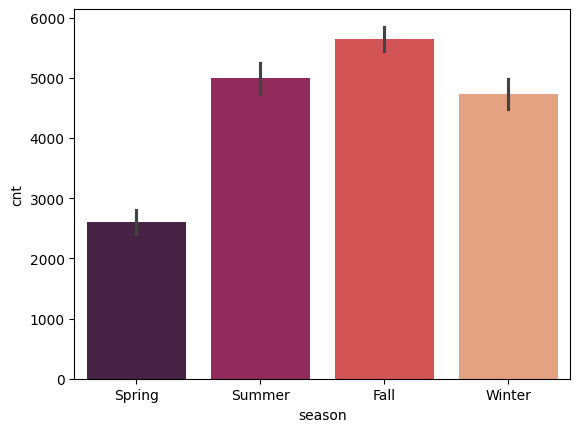

In [ ]:
sns.barplot(data=bike_new,x='season',y='cnt',palette='rocket')
plt.show()

<Axes: xlabel='mnth', ylabel='cnt'>

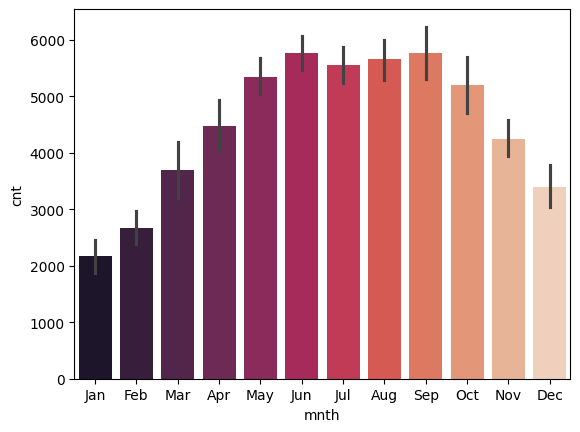

In [ ]:
sns.barplot(data=bike_new,x='mnth',y='cnt',palette='rocket')

<Axes: xlabel='weathersit', ylabel='cnt'>

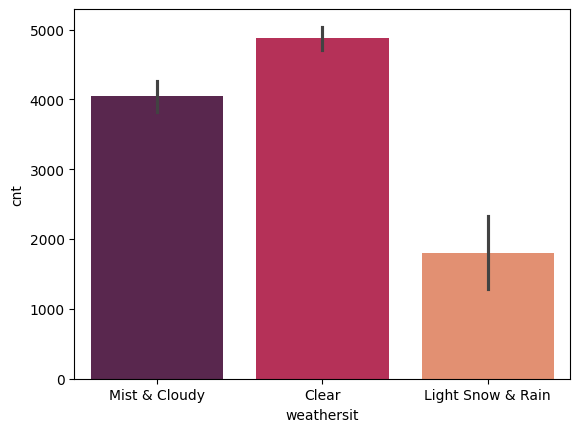

In [ ]:
sns.barplot(data=bike_new,x='weathersit',y='cnt',palette='rocket')

<Axes: xlabel='weekday', ylabel='cnt'>

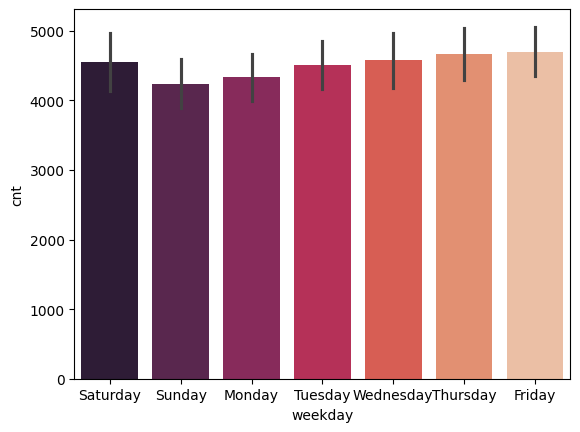

In [ ]:
sns.barplot(data=bike_new,x='weekday',y='cnt',palette='rocket')

<Axes: xlabel='mnth', ylabel='cnt'>

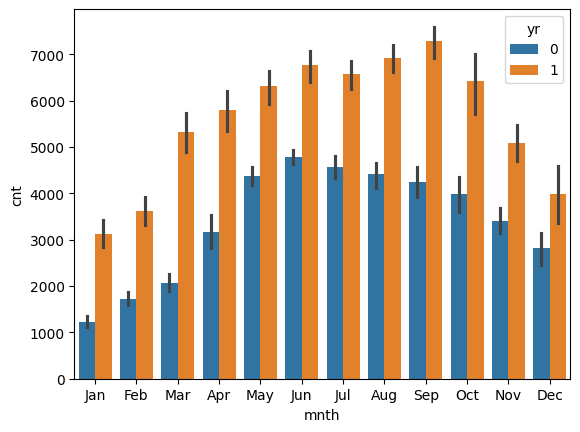

In [ ]:
sns.barplot(data=bike_new,x='mnth',y='cnt',hue='yr')

#### Task 9: Creating Dummy Variables

The variables `mnth` `weekday` `season` `weathersit` have various levels, for ex, `weathersit` has 3 levels , similarly variable `mnth` has 12 levels.   
Create DUMMY variables for these 4 categorical variables namely - `mnth`, `weekday`, `season` & `weathersit`.

In [ ]:
# Add the dummy variables to the original dataset


bike_featured = pd.get_dummies(bike_new, columns=['mnth', 'weekday', 'season', 'weathersit'],drop_first=False,dtype=int)
bike_featured.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,mnth_Apr,mnth_Aug,...,mnth_Jun,mnth_Mar,mnth_May,mnth_Nov,mnth_Oct,mnth_Sep,season_Fall,season_Spring,season_Summer,season_Winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
# Check the dataframe
bike_featured.tail()
bike_featured.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   yr             730 non-null    int64  
 1   holiday        730 non-null    int64  
 2   workingday     730 non-null    int64  
 3   temp           730 non-null    float64
 4   atemp          730 non-null    float64
 5   hum            730 non-null    float64
 6   windspeed      730 non-null    float64
 7   cnt            730 non-null    int64  
 8   mnth_Apr       730 non-null    int64  
 9   mnth_Aug       730 non-null    int64  
 10  mnth_Dec       730 non-null    int64  
 11  mnth_Feb       730 non-null    int64  
 12  mnth_Jan       730 non-null    int64  
 13  mnth_Jul       730 non-null    int64  
 14  mnth_Jun       730 non-null    int64  
 15  mnth_Mar       730 non-null    int64  
 16  mnth_May       730 non-null    int64  
 17  mnth_Nov       730 non-null    int64  
 18  mnth_Oct  

In [ ]:
# Delete the orginal columns season.weathersit,weekday,mnth
#The original column dies not reflected in the bike_featured data frame

## Step 4: Splitting the Data into Training and Testing Sets


#### Task 10: The first basic step for regression is to perform a train-test split.

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
#Dropping 'cnt ' from X
X=bike_featured.drop('cnt',axis=1)
y=bike_featured['cnt']

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Split the training data into training (75%) and validation (25%)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=2024)

# Print shapes of the splits
print(f"X_train Shape: {X_train.shape}")
print(f"X_valid Shape: {X_valid.shape}")
print(f"X_test Shape: {X_test.shape}")

X_train Shape: (438, 23)
X_valid Shape: (146, 23)
X_test Shape: (146, 23)


In [ ]:
print(X_train.head())


     yr  holiday  workingday       temp     atemp      hum  windspeed  \
312   0        0           1  16.400000  20.45395  75.8333   4.167119   
246   0        0           0  29.075847  33.27145  74.2083  13.833289   
466   1        0           1  16.297500  19.38020  46.6250  19.458743   
281   0        0           0  22.174153  26.19915  72.7500   4.251150   
540   1        0           1  29.349153  32.70210  50.4167  20.125661   

     mnth_Apr  mnth_Aug  mnth_Dec  ...  mnth_Jun  mnth_Mar  mnth_May  \
312         0         0         0  ...         0         0         0   
246         0         0         0  ...         0         0         0   
466         1         0         0  ...         0         0         0   
281         0         0         0  ...         0         0         0   
540         0         0         0  ...         1         0         0   

     mnth_Nov  mnth_Oct  mnth_Sep  season_Fall  season_Spring  season_Summer  \
312         1         0         0            0  

## Step 5 :Rescaling the Features

Although scaling doesnot impact the linear model in the case of simple linear regression, however while performing multiple linear regression it might impact the model. As we can see that the value of the feature cnt has much higher values as compared to the other features like temp, atemp etc.So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. There are two common ways of rescaling:

- Min-Max scaling
- Standardisation (mean-0, sigma-1)

#### Task 11: This time,  use Standardisation scaling.

1. Select Numerical Features:


In [ ]:
# Select numerical columns
numerical_cols = X_train[['temp', 'atemp', 'windspeed', 'hum']].columns
X_train_numerical = X_train[numerical_cols]
X_test_numerical = X_test[numerical_cols]

2. Split the Data into Training and Testing Sets:


3. Standardize/Scale the Features (optional but recommended for multiple regression):


In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
X_train_numerical_scaled = scaler.fit_transform(X_train_numerical)
X_test_numerical_scaled = scaler.transform(X_test_numerical)

4. Build the Model:


In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the Linear Regression model
model_numerical = LinearRegression()

# Train the model on the training data
model_numerical.fit(X_train_numerical_scaled, y_train)

LinearRegression()

5. Evaluate the Model:


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_test_pred_numerical = model_numerical.predict(X_test_numerical_scaled)

# Evaluate the model on the test set
mse_test_numerical = mean_squared_error(y_test, y_test_pred_numerical)
r2_test_numerical = r2_score(y_test, y_test_pred_numerical)

print("Test MSE (Numerical Features):", mse_test_numerical)
print("Test R² (Numerical Features):", r2_test_numerical)

Test MSE (Numerical Features): 1990572.7186664967
Test R² (Numerical Features): 0.43590546864120816


6. Model Coefficients:


In [ ]:
# Print the coefficients
coefficients_numerical = pd.DataFrame({
    'Feature': numerical_cols,
    'Coefficient': model_numerical.coef_
})
print("Coefficients for Numerical Features:")
print(coefficients_numerical)

Coefficients for Numerical Features:
     Feature  Coefficient
0       temp   876.131810
1      atemp   436.452478
2  windspeed  -292.198163
3        hum  -396.951562


Task 12: Check the coefficients to see which variables are highly correlated

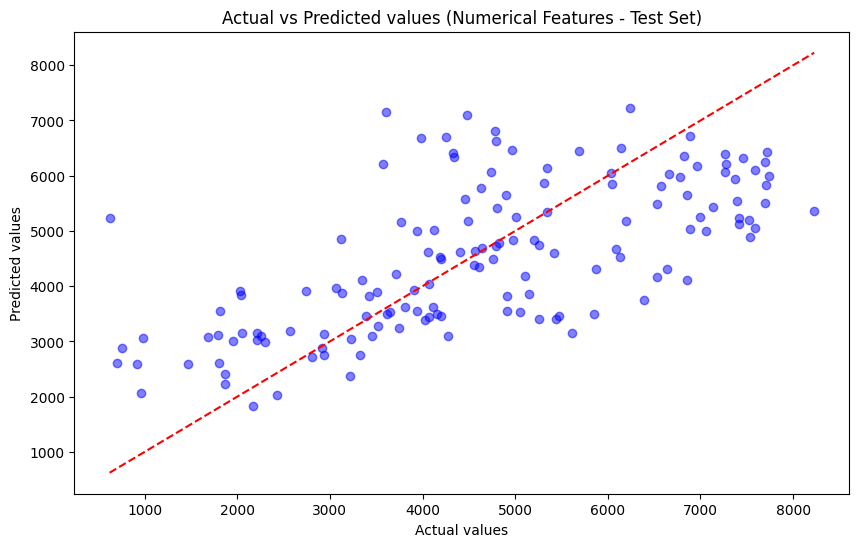

In [ ]:

# Plot actual vs predicted values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_numerical, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted values (Numerical Features - Test Set)")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

### <font color = 'red'> Conclusion: </font>
As can be seen from the map, `atemp` and `temp` seems to be correlated to the target variable `cnt`. Since, not much can be stated about the other independent variables , hence we'll build a model using all the columns.

Task 13: Dividing into X and Y sets for the model
building

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X = bike_featured.drop('cnt', axis=1)
y = bike_featured['cnt']

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

## Step 6: Building a linear model

APPROACH USED :

We will use a mixed approach to build the model.

Here we are using `RFE` approach for feature selection and then we will use the sklearn approach for building the model

#### Task 14: Learn more about RFE and try to apply this.

### Feature Selection

We start with 15 variables.

We need to use the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [ ]:
# Import necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [ ]:

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Initialize RFE with 15 features
model = LinearRegression()
rfe = RFE(model, n_features_to_select=15)
X_rfe = rfe.fit_transform(X, y)

# Display selected features
selected_features = X.columns[rfe.support_]
print(selected_features)

Index(['yr', 'holiday', 'temp', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'season_Spring', 'season_Summer', 'season_Winter'],
      dtype='object')


### Building model using sklearn

Final model

In [ ]:
# Import the LinearRegression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


#### Task 15: Running the linear model

In [ ]:
# Train the model with selected features
X_selected = X[selected_features]
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=2025)

linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = linear_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")

Test MSE: 781180.1137802121
Test R²: 0.7786268112401047


 Task 16: Check VIF for multicollinearity

Variance Inflation Factor or VIF, gives a basic quantitative idea about how much the feature variables are correlated with each other. It is an extremely important parameter to test our linear model. The formula for calculating `VIF` is:

### $ VIF_i = \frac{1}{1 - {R_i}^2} $

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Calculate VIF for selected features
vif_data = pd.DataFrame()
vif_data["feature"] = X_selected.columns
vif_data["VIF"] = [variance_inflation_factor(X_selected.values, i) for i in range(X_selected.shape[1])]
print(vif_data)

          feature       VIF
0              yr  2.021671
1         holiday  1.048910
2            temp  5.364234
3        mnth_Apr  3.574637
4        mnth_Aug  1.733254
5        mnth_Dec  1.472118
6        mnth_Jan  1.833983
7        mnth_Jun  2.596482
8        mnth_Mar  1.902891
9        mnth_May  3.815438
10       mnth_Nov  1.716850
11       mnth_Sep  1.418870
12  season_Spring  2.793270
13  season_Summer  7.416263
14  season_Winter  2.739609


In [ ]:
# Drop features with VIF > 5
features_to_drop = vif_data[vif_data['VIF'] > 5]['feature'].tolist()
X_vif_reduced = X_selected.drop(columns=features_to_drop)

# Recalculate VIF
vif_data_updated = pd.DataFrame()
vif_data_updated["feature"] = X_vif_reduced.columns
vif_data_updated["VIF"] = [variance_inflation_factor(X_vif_reduced.values, i) for i in range(X_vif_reduced.shape[1])]
print(vif_data_updated)

          feature       VIF
0              yr  1.797295
1         holiday  1.041175
2        mnth_Apr  1.076141
3        mnth_Aug  1.076323
4        mnth_Dec  1.455366
5        mnth_Jan  1.758290
6        mnth_Jun  1.073861
7        mnth_Mar  1.334513
8        mnth_May  1.078496
9        mnth_Nov  1.713201
10       mnth_Sep  1.096639
11  season_Spring  2.347390
12  season_Winter  2.233649


#### Note:
The VIF value of temp is nearly equal to 5. Hence, we are not dropping this feature.

#### Task 18: Preparing the final model

In [ ]:
X_final = X_vif_reduced
y_final = y

X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=2025)

final_model = LinearRegression()
final_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred = final_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Test MSE: {mse}")
print(f"Test R²: {r2}")



Test MSE: 897733.296493102
Test R²: 0.7455976169965265


In [ ]:
# Get common columns between training and test sets
common_cols = X_train.columns.intersection(X_test.columns)

print(common_cols)

Index(['yr', 'holiday', 'mnth_Apr', 'mnth_Aug', 'mnth_Dec', 'mnth_Jan',
       'mnth_Jun', 'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Sep',
       'season_Spring', 'season_Winter'],
      dtype='object')


### <font color = 'red'> Conclusion: </font>

Here we see that except for temp(that has a vif value slightly more than 5, that can be ignored) rest all the columns have a vif value less than 5.

Hence, we finalise `lm_2` as the final model to proceed with the future prdeictions.

## Step 7: Residual Analysis of the train data

#### Task 19: So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

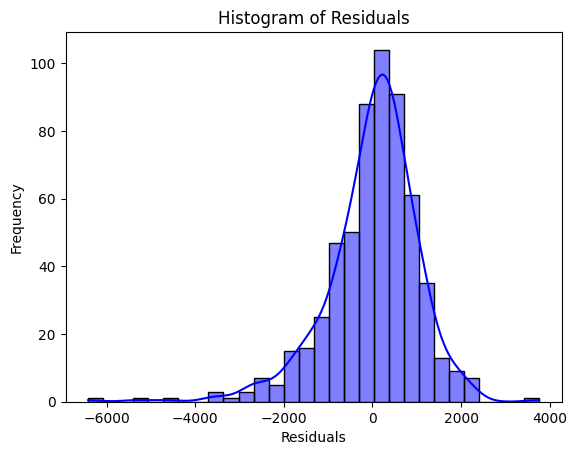

In [ ]:
# Calculate residuals
y_train_pred = final_model.predict(X_train)
residuals = y_train - y_train_pred

# Plot histogram of residuals
sns.histplot(residuals, kde=True, color='blue', bins=30)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

### <font color = 'red'> Conclusion: </font>

We can clearly see that the error terms are centred around 0 and follows a normal distribution, this is in accordance with the stated assumptions of linear regression.

#### Task 20:  Cross-verifying the above conclusion using a qq-plot as well:

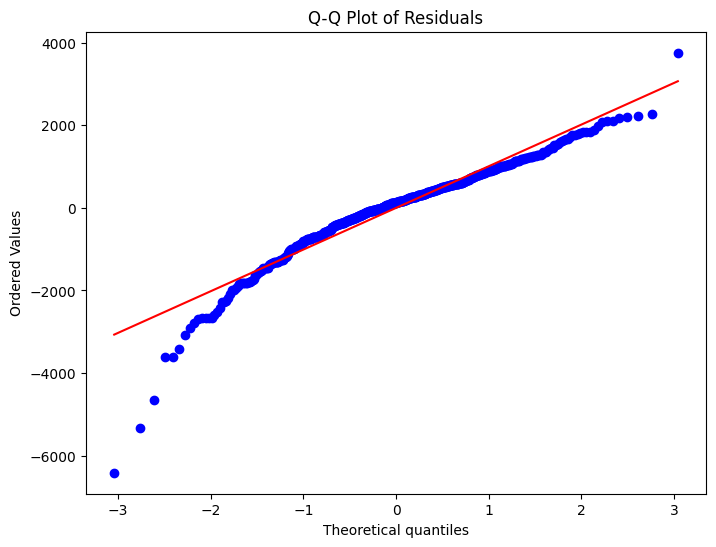

In [ ]:
import scipy.stats as stats

# Generate Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

### Conclusion:
Here we see that most of the data points lie on the straight line , which indicates that the error terms are normally distributed .

## Step 8: Making Predictions Using the Final Model

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model that we got.

#### Task 21:  Applying the scaling on the test sets

In [ ]:

# Make predictions on the test set
y_pred = final_model.predict(X_test)
print("Predictions:", y_pred[:10])

Predictions: [6737.94026109 3133.00338716 3468.78870401 5343.9930779  6285.02987291
 6882.6130359  3141.95181661 3133.00338716 1084.98879379 6437.09513962]


#### Task 22 :  Dividing into X_test and y_test

In [ ]:
# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2025)

# Check the shapes of X_test and y_test
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_test: (146, 23)
Shape of y_test: (146,)


In [ ]:
#Ensuring Consistent Columns =====
# Ensure X_train and X_test have the same columns
#X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

#### Task 23:  Predicting using values used by the final model

In [ ]:

# Predictions are already made in Task 21

#### Task 24:  Calculating the r-squared

R-squared is a goodness-of-fit measure for linear regression models. This statistic indicates the percentage of the variance in the dependent variable that the independent variables explain collectively. R-squared measures the strength of the relationship between your model and the dependent variable on a convenient 0 – 100% scale.

In [ ]:

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared:.4f}")

R-squared: 0.7456


### <font color = 'red'> Conclusion: </font>

We can see that the `r_squared on the test set is 0.813` and the `r-squared on the trained set 0.840` which is quiet reasonable and nearly equal, which means that whatever data the model was trained with, it has been almost able to apply those learnings in the test data.

## Step 9: Model Evaluation

#### Task 25: Plotting the graph for actual versus predicted values.

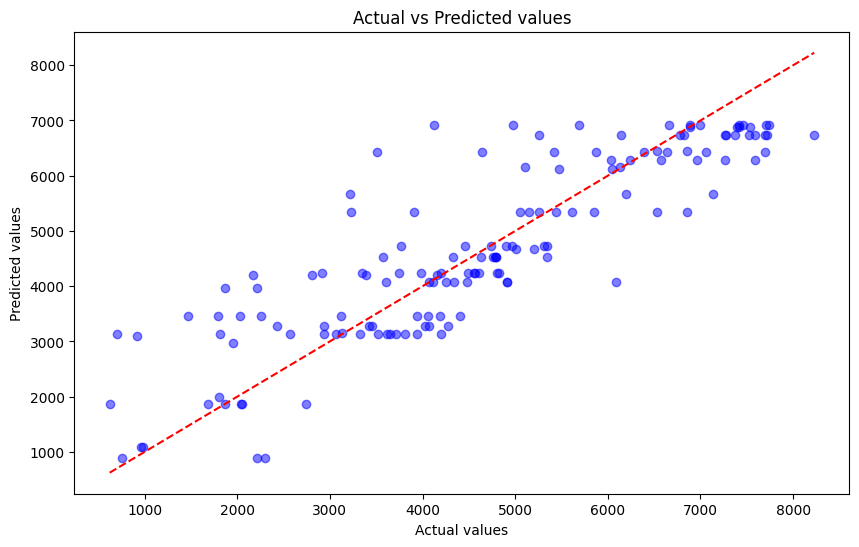

In [ ]:

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.title("Actual vs Predicted values")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()

### Conclusion:
We can colude that the final model fit isn't by chance, and has descent predictive power.

#### Task 26: Getting the variable names and the coefficient values for the final equation of the best fitted line

In [ ]:

# Extract the coefficients and corresponding feature names
coefficients = pd.DataFrame({
    'Feature': X_final.columns,
    'Coefficient': final_model.coef_
})

# Added the intercept to the coefficients dataframe
intercept = final_model.intercept_
intercept_row = pd.DataFrame({'Feature': ['Intercept'], 'Coefficient': [intercept]})

# pd.concat() to add the intercept row to the coefficients dataframe
coefficients = pd.concat([coefficients, intercept_row], ignore_index=True)

# Display the coefficients
print(coefficients)

# equation of the best-fitted line
equation = "cnt = "
for index, row in coefficients.iterrows():
    if row['Feature'] == 'Intercept':
        equation += f"{row['Coefficient']:.2f}"
    else:
        equation += f" + ({row['Coefficient']:.2f} * {row['Feature']})"

print("\nEquation of the Best-Fitted Line:")
print(equation)

          Feature  Coefficient
0              yr  2202.041261
1         holiday  -322.183143
2        mnth_Apr  -614.199908
3        mnth_Aug   452.910388
4        mnth_Dec -1102.050491
5        mnth_Jan  -912.403210
6        mnth_Jun   641.341034
7        mnth_Mar  -123.130923
8        mnth_May   164.710027
9        mnth_Nov -1093.102062
10       mnth_Sep   445.517896
11  season_Spring -2085.596608
12  season_Winter   152.065267
13      Intercept  4082.988612

Equation of the Best-Fitted Line:
cnt =  + (2202.04 * yr) + (-322.18 * holiday) + (-614.20 * mnth_Apr) + (452.91 * mnth_Aug) + (-1102.05 * mnth_Dec) + (-912.40 * mnth_Jan) + (641.34 * mnth_Jun) + (-123.13 * mnth_Mar) + (164.71 * mnth_May) + (-1093.10 * mnth_Nov) + (445.52 * mnth_Sep) + (-2085.60 * season_Spring) + (152.07 * season_Winter)4082.99


### <font color = 'red'> Final Conclusions : </font>
By using the above scatter plot and the table , We can see that the equation of our best fitted line is:

$ cnt = 0.2466 + 0.437 \times  temp + 0.2342  \times  yr + 0.8865 \times season Winter + 0.0682 \times mnth Sept + 0.0033 \times season Summer - 0.0418 \times mnth Nov - 0.04452 \times mnth Dec - 0.0050 \times mnth Jan - 0.0503 \times mnth Jul - 0.0716 \times season Spring - 0.0814 \times weathersit Mist Cloudy - 0.0919 \times holiday - 0.1585 \times windspeed - 0.2928 \times weathersit Light Snow Rain $

##### All the positive coefficients like temp,season_Summer indicate that an increase in these values will lead to an increase in the value of cnt.
##### All the negative coefficients indicate that an increase in these values will lead to a decrease in the value of cnt.

- From R-Sqaured and adj R-Sqaured value of both train and test dataset we could conclude that the above variables can well explain more than 81% of bike demand.
- Coeffiencients of the variables explains the factors effecting the bike demand

- Based on final model top three features contributing significantly towards explaining the demand are:

 - Temperature (0.437655)
 - weathersit : Light Snow, Light Rain + Mist & Cloudy (-0.292892)
 - year (0.234287)

Hence, it can be clearly concluded that the variables `temperature` , `season`/ `weather situation` and `month`  are significant in predicting the demand for shared bikes .

## Final Recommendations for the Company:
- The months - Jan , Jul , Sep , Nov , Dec should be considered by the company as they have a higher demand as compared to other months.
- With an increase in temperature the demand also increases, hence it should keep track of the weather conditions.
- During the Winter season the demand rises, hence it should be well prepared to meet the high demand